<a href="https://colab.research.google.com/github/EddyGiusepe/Pytorch_Deep_Learning/blob/main/Pytorch_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Pytorch: Deep Learning</h2>

## Data Scientist Jr: Dr.Eddy Giusepe Chirinos Isidro 


[Primeiros Passos com Pytorch | Deep Learning na prática](https://www.youtube.com/watch?v=pQs7BCkqz9Q).




## Importamos as nossas bibliotecas

In [1]:
import numpy as np
import torch


import matplotlib.pyplot as plt 
%matplotlib inline 



## Download ``MNIST`` Dataset

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]) # Aqui transforma os Dados em Tensores e logo Normalizamos esses Dados


# Download Dados de treino
trainset = datasets.MNIST('/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/1_Pytorch_Deep_Learning/MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)


In [3]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/1_Pytorch_Deep_Learning/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [4]:
trainloader

## A imagem

Dasse DataLoad em ``Pytorch`` nos ajuda a carregar e iterar sobre elementos em um conjunto de Dados. Esta classe está disponível como DataLoader no módulo torch.utils.data module. Agora nós temos os Dados de treinamento no objeto ``trainloader``. Vamos criar um interator em trainloader para que possamos fazer loop nos Dados MNIST.


* Batch tamanho 10:
  * Representa o número de imagens que nós vamos utilizar a cada iteração que possamos na nossa ``Rede Neural``.

* Shufle = True:
  * Para embaralhar os Dados.


Vamos dar uma olhada na primeira Batch:  


In [10]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

In [11]:
print('Image type: ', type(images))
print("")
print('image shape:', images.shape)

# torch.Size([10, 1, 28, 28]) --> batch=10; 1 --> Grey scale; 28x28 pixeis (da imagem == Uma matriz de 28x28)  

Image type:  <class 'torch.Tensor'>

image shape: torch.Size([10, 1, 28, 28])


In [12]:
print('Labels shape : ', labels.shape)
print("")
print('Labels :', labels) # as Labels sã0 --> 0, 1, 2, 3, 4, 5, 6, 7, 8 e 9. 

Labels shape :  torch.Size([10])

Labels : tensor([0, 0, 4, 5, 3, 9, 7, 3, 8, 4])


Podemos ver que as imagens são tensores com shape [10, 1, 28, 28]. Ou seja, temos aqui $10$ imagens por batch com um ("1") color channel (cinza) e $28$x$28$ pixels por imagem.

Assitir o seguinte vídeo:

* [Rede Neural -- Deep Learning](https://www.youtube.com/watch?v=aircAruvnKk&t=234s)

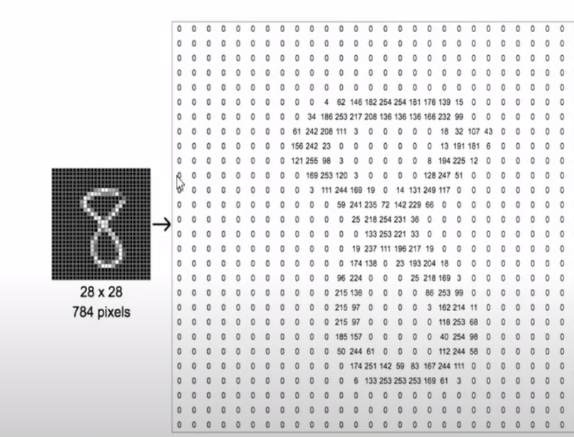

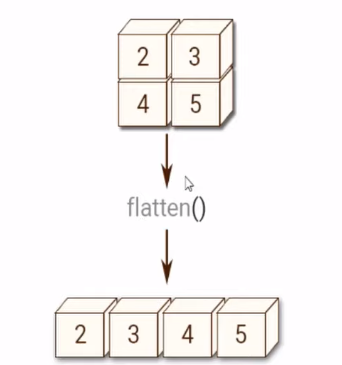

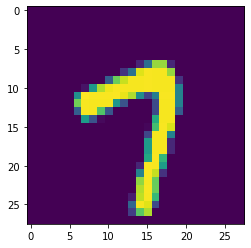

In [8]:
plt.imshow(images[8].numpy().squeeze());

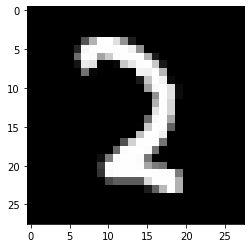

In [9]:
plt.imshow(images[9].numpy().squeeze(), cmap='Greys_r');

## Criando a Rede Neural - nosso Modelo

* Aqui vamos criar um modelo com uma saída ``log-softmax`` usando nn.LogSoftmax e depois obtemos as probabilidades reais tomando o exponencial torch 

* Com uma saída log-softmax, podemos calcular a negative log likelihood loss, ``nn.NLLLoss``.

In [10]:
from torch import nn


class Network(nn.Module):

  def __init__(self):
      super().__init__() # Coloco isto porque estou heredando de lá: "nn.model"

      # Inputs da camada escondida (ou hidden layer) - transformação linear
      self.hidden_1 = nn.Linear(784, 128)
      self.hidden_2 = nn.Linear(128, 64)

      # Camada de saída (ou Output layer), 10 neurônios ou unidades - 
      # um para cada dígito do nosso dataset (0, 1, 2, 3, 4, 5, 6, 7, 8, ,9)
      self.output = nn.Linear(64, 10)

      # Define Relu activation e LogSoftmax output
      self.Relu = nn.ReLU()
      self.LogSoftmax = nn.LogSoftmax(dim=1)


  def forward(self, x):
    
    # Pass o vetor de input em cada uma das nossas operações 
    x = self.hidden_1(x)
    x = self.Relu(x) 

    x = self.hidden_2(x)
    x = self.Relu(x)

    x = self.output(x)
    x = self.LogSoftmax(x)


    return x


In [11]:
# Instanciamos nosso modelo
modelo = Network()

# Nosso modelo
modelo

Network(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (Relu): ReLU()
  (LogSoftmax): LogSoftmax(dim=1)
)

In [12]:
images.shape[0]

10

In [13]:
print('image (shape): ', images.shape)
print("")
print('image shape[0]:', images.shape[0])
print("")
print("images.view(images.shape[0], -1).shape: ", images.view(images.shape[0], -1).shape)


image (shape):  torch.Size([10, 1, 28, 28])

image shape[0]: 10

images.view(images.shape[0], -1).shape:  torch.Size([10, 784])


In [14]:
from torch import optim


criterion = nn.NLLLoss() #  A nossa Loss
optimizer = optim.SGD(modelo.parameters(), lr=0.003) # Using SGD = Gradiente descente estocástico; lr = Taxa de aprendizado


epocas = 5

for epoca in range(epocas):
  loss_ = 0
  for images, labels in trainloader:
    # Flatten imagem em vetor de 784 elementos
    images = images.view(images.shape[0], -1) # Para a dimensão de nossa rede (transformar a imagem)


    optimizer.zero_grad()  # Zeramos para não acumular. Por exemplo: Na hora de aplicar o Backpropagation
    output = modelo.forward(images)
    loss = criterion(output, labels)
    loss.backward() # É nossa backpropagation
    optimizer.step()

    loss_ += loss.item()

  else:
    print(f"Loss Treino: {loss_/len(trainloader)}")  
    


Loss Treino: 0.7269037534135083
Loss Treino: 0.3209042396635438
Loss Treino: 0.27092365304667815
Loss Treino: 0.2320467388741672
Loss Treino: 0.20123241327136446


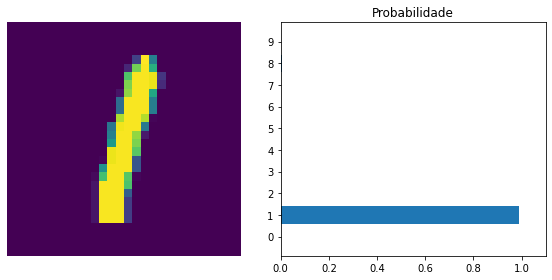

In [15]:
images, labels = next(iter(trainloader))

#torch.size([1, 784])
img = images[0].view(1, 784)

# Bloqueia o cálculo de gradiente - usado para avaliação
with torch.no_grad():
  logs = modelo(img)

# Outout of the network are log-probabilities, need to take axponential for probabilities
p = torch.exp(logs)
p = p.data.numpy().squeeze()  


fig, (ax1, ax2) = plt.subplots(figsize = (8, 4), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), p)
ax2.set_yticks(np.arange(10))

ax2.set_yticklabels(np.arange(10))

ax2.set_title('Probabilidade')
ax2.set_xlim(0, 1.1)

plt.tight_layout()



# Uma outra forma

Aqui vamos a usar a forma: ``nn.Sequencial``

In [7]:
from torch import nn
from torch import optim


model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))


criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    # Flatten  MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1) # Para a dimensão de nossa rede (transformar a imagem)

    # Quando tens iterações de backpropagation com os mesmos parâmetros, os gradientes são acumulados
    # Por isso precisamos zerar os gradientes em cada passagem de TREINAMENTO ou você manterá os gradientes dos batches de treinamento anteriores
    optimizer.zero_grad()  # Zeramos para não acumular. Por exemplo: Na hora de aplicar o Backpropagation
   
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward() # É nossa backpropagation
    optimizer.step()

    running_loss += loss.item()

  else:
    print(f"Loss Treino: {running_loss/len(trainloader)}")  

Loss Treino: 0.7233895142651163
Loss Treino: 0.316821537409133
Loss Treino: 0.2651340362081925
Loss Treino: 0.2263926472203651
Loss Treino: 0.19615313247327382


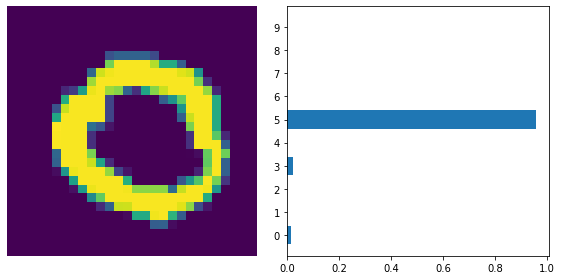

In [23]:
img = images[0].view(1, 784)

def show_classes(image, ps):

  ps = ps.data.numpy().squeeze()  

  fig, (ax1, ax2) = plt.subplots(figsize = (8, 4), ncols=2)
  ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
  ax1.axis('off')
  ax2.barh(np.arange(10), ps)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(np.arange(10))

  plt.tight_layout()


images, labels = next(iter(trainloader))

image = images[0].view(1, 784)

with torch.no_grad():
  logs = model(image)

# A saída da rede são probabilidades logarítmicas
# Precisamos transforma-las em exponenciais para dar probabilidades
p = torch.exp(logs)


show_classes(image, p)
